# Week 3 - Group Assignment 2
**Description:** Exploring household income in LA County

**Author:** Annie Chan (I'm in a group with Miles Kim Parr, Aydin Pasebani, Max Garcia, and Rodrigo Gutierrez)

First, let's bring in the pandas and geopandas libraries.

In [26]:
import pandas as pd
import geopandas as gpd

Next, I'm going to load in the dataset I downloaded from the US Census website. I downloaded household income in 2021 in LA County (from the ACS 5-year estimates) as a .zip file. Then I used Chris' instructions to split the Geo_ID column to get FIPS codes in Microsoft Excel. I also renamed columns in Microsoft Excel (I forgot I could do this in Python, oops).

Using the code we learned in lecture, I'm importing in the GEO_ID column as a string so that the leading zeros make it in.

In [33]:
income = pd.read_csv(
    'data/FINAL_HouseholdIncome2021_LACounty_Data_CSV.csv',
    dtype=
    {
        'GEO_ID': str
    }
)

# Preliminary Inspection
Using ```shape```, ```head```, and ```info``` to look at the data. There are 2499 rows and 35 columns, and it appears that we did get the leading zeros in for the GEO_ID column.

In [35]:
income.shape

(2499, 35)

In [40]:
income.head()

,GEO_ID,Households,HH_MOE,HH_Less_Than_10K,HH_Less_Than_10K_MOE,HH_10K_To_14999,HH_10K_to_14999_MOE,HH_15K_To_19999,HH_15K_To_19999_MOE,HH_20K_To_24999,...,HH_75K_To_99999,HH_75K_To_99999_MOE,HH_100K_To_124999,HH_100K_To_124999_MOE,HH_125K_To_149999,HH_125K_To_149999_MOE,HH_150K_To_199999,HH_150K_To_199999_MOE,HH_200K_Or_More,HH_200K_Or_More_MOE
0,06037,3342811,5387,180980,3750,142812,2810,112340,2741,121032,...,414844,4941,325230,4641,237643,3257,299389,3720,418793,4962
1,06037101110,1494,123,54,37,126,82,49,46,33,...,146,69,210,79,134,64,143,83,90,52
2,06037101122,1372,167,88,74,0,13,7,11,42,...,158,58,126,57,194,135,168,77,253,83
3,06037101220,1357,201,78,53,82,39,28,27,102,...,134,65,116,68,60,35,140,152,112,64
4,06037101221,1450,287,76,110,107,123,118,76,148,...,193,109,207,107,33,41,108,93,0,13


In [42]:
income.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GEO_ID                 2499 non-null   object
 1   Households             2499 non-null   int64 
 2   HH_MOE                 2499 non-null   int64 
 3   HH_Less_Than_10K       2499 non-null   int64 
 4   HH_Less_Than_10K_MOE   2499 non-null   int64 
 5   HH_10K_To_14999        2499 non-null   int64 
 6   HH_10K_to_14999_MOE    2499 non-null   int64 
 7   HH_15K_To_19999        2499 non-null   int64 
 8   HH_15K_To_19999_MOE    2499 non-null   int64 
 9   HH_20K_To_24999        2499 non-null   int64 
 10  HH_20K_To_24999_MOE    2499 non-null   int64 
 11  HH_25K_To_29999        2499 non-null   int64 
 12  HH_25K_To_29999_MOE    2499 non-null   int64 
 13  HH_30K_To_34999        2499 non-null   int64 
 14  HH_30K_To_34999_MOE    2499 non-null   int64 
 15  HH_35K_To_39999      

In [43]:
#confirm we have no columns that are entirely empty
income.columns[income.isna().all()].tolist()

[]

## Charts

This histogram looks strange.

<Axes: ylabel='Frequency'>

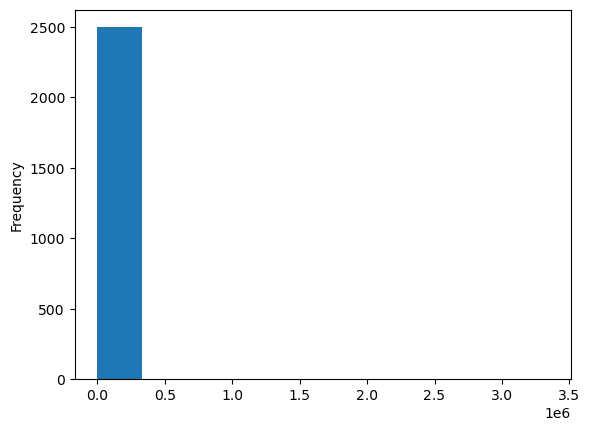

In [46]:
income['Households'].plot.hist()

I think it's because the first row of data in this dataset is the sum of all households in LA County. I'm going to try and drop the first row. I found this code from the Internet.

In [47]:
income.drop(index=income.index[0], axis=0, inplace=True)

Checking with ```head```, seems to have worked!

In [48]:
income.head()

,GEO_ID,Households,HH_MOE,HH_Less_Than_10K,HH_Less_Than_10K_MOE,HH_10K_To_14999,HH_10K_to_14999_MOE,HH_15K_To_19999,HH_15K_To_19999_MOE,HH_20K_To_24999,...,HH_75K_To_99999,HH_75K_To_99999_MOE,HH_100K_To_124999,HH_100K_To_124999_MOE,HH_125K_To_149999,HH_125K_To_149999_MOE,HH_150K_To_199999,HH_150K_To_199999_MOE,HH_200K_Or_More,HH_200K_Or_More_MOE
1,06037101110,1494,123,54,37,126,82,49,46,33,...,146,69,210,79,134,64,143,83,90,52
2,06037101122,1372,167,88,74,0,13,7,11,42,...,158,58,126,57,194,135,168,77,253,83
3,06037101220,1357,201,78,53,82,39,28,27,102,...,134,65,116,68,60,35,140,152,112,64
4,06037101221,1450,287,76,110,107,123,118,76,148,...,193,109,207,107,33,41,108,93,0,13
5,06037101222,935,148,161,92,167,145,34,40,41,...,96,79,9,15,81,74,0,13,32,53


Let's try the histogram again. This looks better!

<Axes: ylabel='Frequency'>

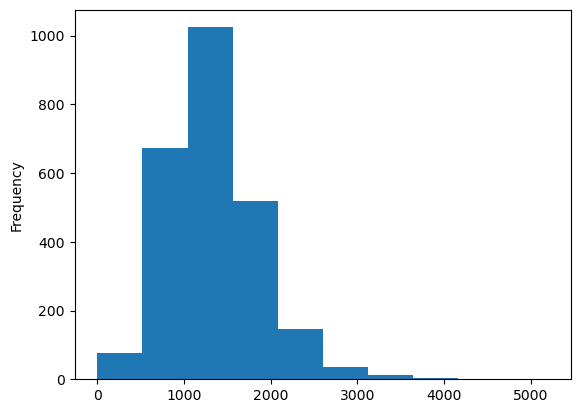

In [49]:
income['Households'].plot.hist()

<Axes: >

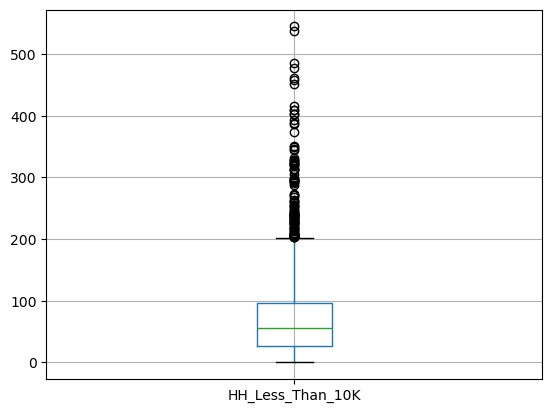

In [50]:
income.boxplot(column=['HH_Less_Than_10K'])

<Axes: xlabel='HH_Less_Than_10K', ylabel='HH_200K_Or_More'>

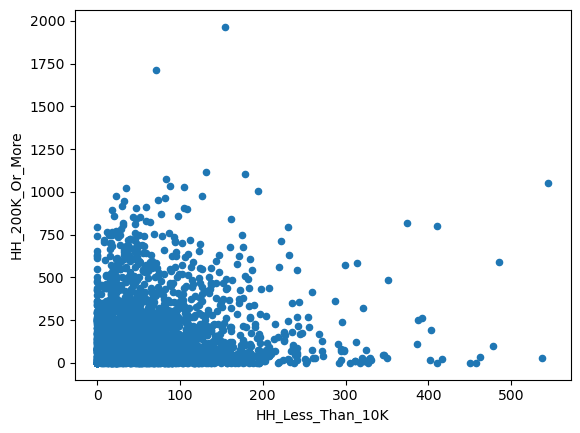

In [51]:
income.plot.scatter(x='HH_Less_Than_10K', y='HH_200K_Or_More')

I was guessing there would be an inverse relationship between households making under 10,000 and households making $200,000 or more, but that  doesn't seem to be the case. I tried again with household income ranges that were less far apart, but there still doesn't seem to be any discernable relationship.

<Axes: xlabel='HH_30K_To_34999', ylabel='HH_100K_To_124999'>

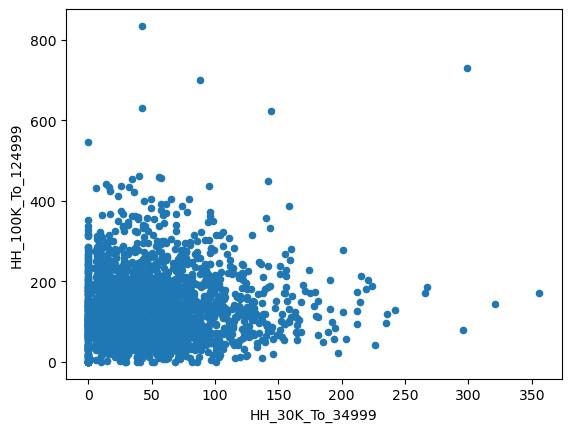

In [52]:
income.plot.scatter(x='HH_30K_To_34999', y='HH_100K_To_124999')

# Sorting and Filtering Data
I want to look at the 10 census tracts with the most households with incomes under 10,000 dollars, and the 10 census tracts with the most household incomes that are 200,000 dollars or more. I do not plan on saving these into newly sorted datasets, I just want to display the data.

In [53]:
income.sort_values(by='HH_Less_Than_10K', ascending = False)[['GEO_ID', 'HH_Less_Than_10K']].head(10)

,GEO_ID,HH_Less_Than_10K
2256,06037701402,545
596,06037207304,538
607,06037207902,485
2027,06037576200,478
631,06037209300,462
589,06037206301,458
907,06037242600,451
2064,06037600202,416
846,06037236205,410
2265,06037701902,410


Looks like FIPS Code 06037701402 has the most households with incomes less than 10,000 dollars, at 545 households. Now let's look at the highest end of the income spectrum:

In [54]:
income.sort_values(by='HH_200K_Or_More', ascending = False)[['GEO_ID', 'HH_200K_Or_More']].head(10)

,GEO_ID,HH_200K_Or_More
1029,06037275604,1965
2279,06037702900,1715
2176,06037621104,1113
924,06037262604,1104
2439,06037920121,1072
2256,06037701402,1054
2223,06037670324,1034
2166,06037620701,1026
2237,06037670702,1023
2255,06037701304,1006


Looks like FIPS Code 06037275604 has the most households with incomes $200K or more, at 1965 households. Not sure if that means there are more very high-income households in LA County on the whole, so I'm going to look at sums.

In [55]:
income['HH_Less_Than_10K'].sum()

180980

In [56]:
income['HH_200K_Or_More'].sum()

418793

From these sums, there are a LOT more very high-income households (418,793 of them) in LA County than very low-income households (180,980 of them).

I think I want to group these income ranges into slightly fewer ranges, so I'm going to sum some columns and then create a new dataset.

New columns: HH_Less_Than_14999, HH_15K_To_44999, HH_45K_To_59999, **keep HH_60K_To_74999, keep HH_75K_To_99999**, HH_100K_To_199999, and **keep HH_200K_Or_More**.

In [57]:
income['HH_Less_Than_14999'] = income[['HH_Less_Than_10K','HH_10K_To_14999']].sum(axis=1)

In [60]:
#reasonability check, seems good
income[['GEO_ID','HH_Less_Than_14999']].head(10)

,GEO_ID,HH_Less_Than_14999
1,06037101110,180
2,06037101122,88
3,06037101220,160
4,06037101221,183
5,06037101222,328
6,06037101300,95
7,06037101400,105
8,06037102103,24
9,06037102104,128
10,06037102105,26


In [61]:
income['HH_15K_To_44999'] = income[['HH_15K_To_19999','HH_20K_To_24999', 'HH_25K_To_29999', 'HH_30K_To_34999', 'HH_35K_To_39999', 'HH_40K_To_44999']].sum(axis=1)

In [62]:
income[['GEO_ID','HH_15K_To_44999']].head(10)

,GEO_ID,HH_15K_To_44999
1,06037101110,294
2,06037101122,148
3,06037101220,321
4,06037101221,485
5,06037101222,296
6,06037101300,196
7,06037101400,357
8,06037102103,233
9,06037102104,231
10,06037102105,97


In [63]:
income['HH_45K_To_59999'] = income[['HH_45K_To_49999','HH_50K_To_59999']].sum(axis=1)

In [64]:
income['HH_100K_To_199999'] = income[['HH_100K_To_124999','HH_125K_To_149999','HH_150K_To_199999']].sum(axis=1)

Now, let's make a new dataset with these variables called **income2**.

In [68]:
income2 = income[['GEO_ID', 'Households','HH_Less_Than_14999', 
'HH_15K_To_44999', 'HH_45K_To_59999', 
'HH_60K_To_74999', 'HH_75K_To_99999', 
'HH_100K_To_199999', 'HH_200K_Or_More']].copy()

In [69]:
income2.head(10)

,GEO_ID,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_59999,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More
1,06037101110,1494,180,294,192,105,146,487,90
2,06037101122,1372,88,148,37,200,158,488,253
3,06037101220,1357,160,321,225,89,134,316,112
4,06037101221,1450,183,485,209,32,193,348,0
5,06037101222,935,328,296,49,44,96,90,32
6,06037101300,1420,95,196,54,123,132,570,250
7,06037101400,1304,105,357,145,68,92,440,97
8,06037102103,669,24,233,49,59,46,218,40
9,06037102104,1310,128,231,58,89,209,390,205
10,06037102105,554,26,97,95,25,145,118,48


# Merging the income2 dataset and census tract geojson together

I downloaded the GeoJSON from the LA County GIS Hub that Chris sent, and then added it to my Week 3 data folder. Let's read it in:

In [71]:
tracts = gpd.read_file('data/2020_Census_Tracts.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [72]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


Creating a 'FIPS' column in the **tracts** dataset so that we can join it with the 'GEO_ID' column in the **income2** dataset.

In [73]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [75]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222


Need to rename the 'GEO_ID' column in the **income2** dataset to 'FIPS' in order to join:

In [76]:
income2 = income2.rename(columns = {'GEO_ID':'FIPS'})

In [77]:
income2.head(10)

,FIPS,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_59999,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More
1,06037101110,1494,180,294,192,105,146,487,90
2,06037101122,1372,88,148,37,200,158,488,253
3,06037101220,1357,160,321,225,89,134,316,112
4,06037101221,1450,183,485,209,32,193,348,0
5,06037101222,935,328,296,49,44,96,90,32
6,06037101300,1420,95,196,54,123,132,570,250
7,06037101400,1304,105,357,145,68,92,440,97
8,06037102103,669,24,233,49,59,46,218,40
9,06037102104,1310,128,231,58,89,209,390,205
10,06037102105,554,26,97,95,25,145,118,48


Okay, now it's finally time to merge datasets!

In [78]:
tracts_income = tracts.merge(income2, on = "FIPS")

In [79]:
tracts_income.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_59999,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,1494,180,294,192,105,146,487,90
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,1372,88,148,37,200,158,488,253
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,1357,160,321,225,89,134,316,112
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1450,183,485,209,32,193,348,0
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,935,328,296,49,44,96,90,32


# Maps

<Axes: >

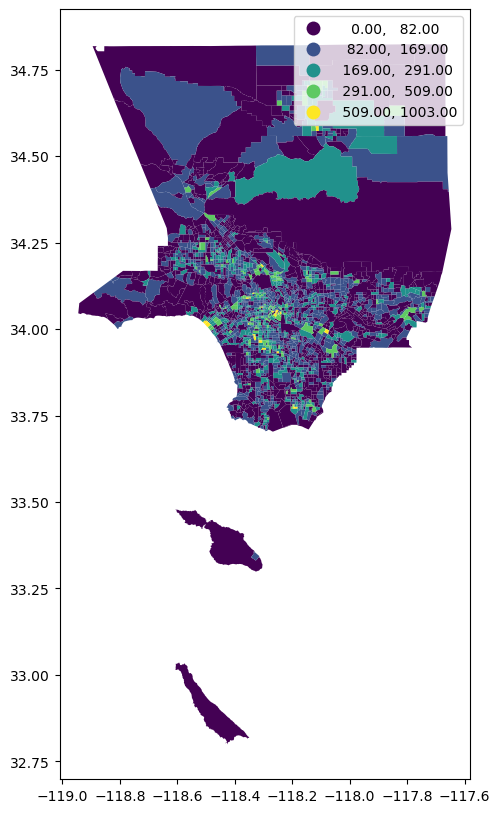

In [111]:
tracts_income.plot(figsize=(12,10),
                 column='HH_Less_Than_14999',
                 legend=True, 
                 scheme='NaturalBreaks')

Looking at this, I realized that I don't know the Supervisorial Districts from this map. I downloaded a new CSV from [LA County Census Tracts Viewer](https://www.arcgis.com/apps/dashboards/e928d021b4d74e5ab4537fac43a3eaf5) to try to look at just District 3.

Let's go through the process again of bringing in a dataset and merging it with income2.

In [85]:
district3 = gpd.read_file('data/Census_Tracts_by_Supervisorial_District.csv')

In [87]:
district3.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,geometry
0,20,2,20,104105,1041.05,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,858384.08984375,4298.39651732659,None
1,21,2,21,104108,1041.08,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1609878.3046875,7002.32712860498,None
2,23,1,23,104201,1042.01,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1600779.58203125,5470.88639823026,None
3,24,1,24,104203,1042.03,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1039483.90234375,4082.25037214934,None
4,26,1,26,104310,1043.10,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,2214855.19140625,7054.2464839749,None


In [88]:
district3['FIPS'] ='06' + '037' + tracts['CT20']

In [89]:
district3.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,geometry,FIPS
0,20,2,20,104105,1041.05,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,858384.08984375,4298.39651732659,None,06037101110
1,21,2,21,104108,1041.08,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1609878.3046875,7002.32712860498,None,06037101122
2,23,1,23,104201,1042.01,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1600779.58203125,5470.88639823026,None,06037101220
3,24,1,24,104203,1042.03,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1039483.90234375,4082.25037214934,None,06037101221
4,26,1,26,104310,1043.10,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,2214855.19140625,7054.2464839749,None,06037101222


In [90]:
district3_income = district3.merge(income2, on = "FIPS")

In [91]:
district3_income.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,...,geometry,FIPS,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_59999,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More
0,20,2,20,104105,1041.05,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,...,None,06037101110,1494,180,294,192,105,146,487,90
1,21,2,21,104108,1041.08,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,...,None,06037101122,1372,88,148,37,200,158,488,253
2,23,1,23,104201,1042.01,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,...,None,06037101220,1357,160,321,225,89,134,316,112
3,24,1,24,104203,1042.03,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,...,None,06037101221,1450,183,485,209,32,193,348,0
4,26,1,26,104310,1043.10,3RD SUP. DISTRICT,3RD DISTRICT: SHEILA KUEHL,3,LOS ANGELES,,...,None,06037101222,935,328,296,49,44,96,90,32


Okay, I think it's time to return to mapping! (Spoiler alert: it was not.)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

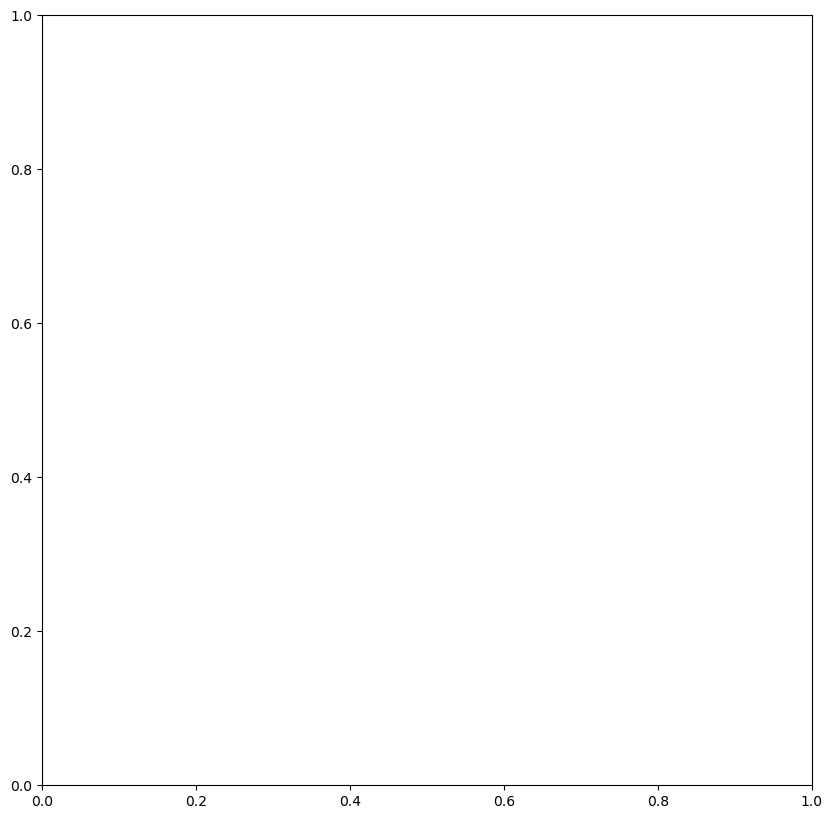

In [92]:
district3_income.plot(figsize=(12,10),
                 column='HH_Less_Than_14999',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

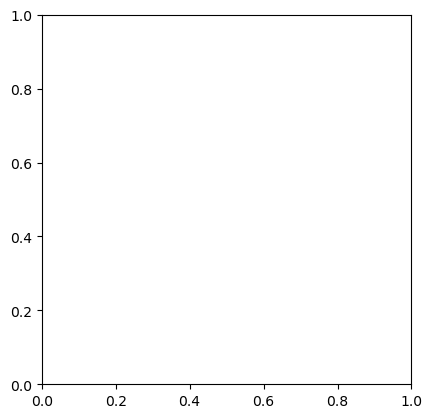

In [93]:
#or...not. what if i just plot?
district3_income.plot()

Well, this empty plot is distressing. I can see that my geometry column is empty in the **district3** dataset, but I'm not sure how to leverage shape_area or shape_length. Instead, I'm going to use a workaround and merge the **district3** dataset into the other dataset I previously merged, **tracts_income**, which I know has a geometry. I'm overwriting the **district3_income** dataset and trying again.

In [106]:
district3_income = district3[['DIST_SUP', 'CITYNAME_ALF', 'NAME_1', 'JURISDICTION', 'Shape__Area', 'Shape__Length', 'FIPS']].merge(tracts_income, on = "FIPS")

In [107]:
district3_income.shape

(557, 21)

In [108]:
district3_income.head()

,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,Shape__Area,Shape__Length,FIPS,OBJECTID,CT20,LABEL,...,ShapeSTLength,geometry,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_59999,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More
0,3,LOS ANGELES,,INCORPORATED CITY,858384.08984375,4298.39651732659,06037101110,4992,101110,1011.10,...,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",1494,180,294,192,105,146,487,90
1,3,LOS ANGELES,,INCORPORATED CITY,1609878.3046875,7002.32712860498,06037101122,4993,101122,1011.22,...,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",1372,88,148,37,200,158,488,253
2,3,LOS ANGELES,,INCORPORATED CITY,1600779.58203125,5470.88639823026,06037101220,4994,101220,1012.20,...,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",1357,160,321,225,89,134,316,112
3,3,LOS ANGELES,,INCORPORATED CITY,1039483.90234375,4082.25037214934,06037101221,4995,101221,1012.21,...,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",1450,183,485,209,32,193,348,0
4,3,LOS ANGELES,,INCORPORATED CITY,2214855.19140625,7054.2464839749,06037101222,4996,101222,1012.22,...,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",935,328,296,49,44,96,90,32


In [118]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222


I do not understand why this won't plot a map, even though there is a geometry in this **district3_income** dataset.

<Axes: >

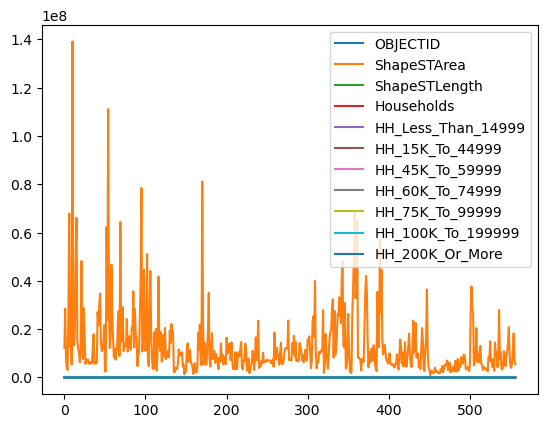

In [117]:
district3_income.plot()

Going back to tracts_income because I cannot make this work.

## Workaround

I couldn't figure out how to join the datasets in a smart way that would allow for plotting. So as a workaround, I went back into the Census Tracts by Supervisorial District in **Microsoft Excel** and created a column of text strings of FIPS codes in there, and then copied that entire column into here in the Jupyter Notebook to make a list. I'm going to filter the successful merged dataset, **tracts_income**, by this list. This is not ideal since this list is 557 strings long, but I don't know how else to do it.

In [162]:
d3_list = ['06037104105',
'06037104108',
'06037104201',
'06037104203',
'06037104310',
'06037104321',
'06037104322',
'06037104401',
'06037104403',
'06037104404',
'06037104500',
'06037104610',
'06037104620',
'06037104701',
'06037104703',
'06037104704',
'06037104821',
'06037104822',
'06037104823',
'06037104824',
'06037106010',
'06037106020',
'06037106111',
'06037106112',
'06037106113',
'06037106114',
'06037106403',
'06037106405',
'06037106406',
'06037106407',
'06037106408',
'06037106510',
'06037106520',
'06037106603',
'06037106604',
'06037106641',
'06037106642',
'06037106643',
'06037106645',
'06037106646',
'06037106648',
'06037106649',
'06037107010',
'06037107020',
'06037108101',
'06037108102',
'06037108103',
'06037108104',
'06037108202',
'06037108203',
'06037108204',
'06037109100',
'06037109200',
'06037109300',
'06037109400',
'06037109500',
'06037109601',
'06037109603',
'06037109604',
'06037109700',
'06037109800',
'06037111100',
'06037111201',
'06037111202',
'06037111204',
'06037111205',
'06037111206',
'06037111302',
'06037111303',
'06037111304',
'06037111401',
'06037111402',
'06037113101',
'06037113102',
'06037113211',
'06037113212',
'06037113213',
'06037113231',
'06037113232',
'06037113234',
'06037113235',
'06037113237',
'06037113238',
'06037113239',
'06037113301',
'06037113303',
'06037113322',
'06037113323',
'06037113324',
'06037113423',
'06037113424',
'06037113425',
'06037113426',
'06037113427',
'06037113428',
'06037115101',
'06037115103',
'06037115104',
'06037115202',
'06037115203',
'06037115204',
'06037115301',
'06037115302',
'06037115401',
'06037115403',
'06037115404',
'06037117101',
'06037117102',
'06037117201',
'06037117202',
'06037117301',
'06037117302',
'06037117303',
'06037117404',
'06037117405',
'06037117407',
'06037117408',
'06037117510',
'06037117520',
'06037117530',
'06037119001',
'06037119003',
'06037119004',
'06037119201',
'06037119202',
'06037119310',
'06037119320',
'06037119340',
'06037119341',
'06037119342',
'06037119400',
'06037119700',
'06037119801',
'06037119802',
'06037119900',
'06037120010',
'06037120020',
'06037120030',
'06037120103',
'06037120104',
'06037120105',
'06037120106',
'06037120107',
'06037120108',
'06037120300',
'06037120400',
'06037121010',
'06037121020',
'06037121210',
'06037121221',
'06037121222',
'06037121600',
'06037121801',
'06037121802',
'06037121900',
'06037122000',
'06037122120',
'06037122121',
'06037122122',
'06037122410',
'06037122420',
'06037123010',
'06037123020',
'06037123203',
'06037123204',
'06037123205',
'06037123206',
'06037123301',
'06037123303',
'06037123304',
'06037123410',
'06037123420',
'06037123510',
'06037123520',
'06037123601',
'06037123602',
'06037123700',
'06037123800',
'06037123901',
'06037124103',
'06037124400',
'06037124500',
'06037124600',
'06037124700',
'06037127102',
'06037127103',
'06037127104',
'06037127210',
'06037127220',
'06037127300',
'06037127400',
'06037127520',
'06037127603',
'06037127604',
'06037127605',
'06037127606',
'06037127711',
'06037127712',
'06037127803',
'06037127804',
'06037127805',
'06037127806',
'06037127910',
'06037127920',
'06037128101',
'06037128102',
'06037128210',
'06037128220',
'06037128302',
'06037128303',
'06037128400',
'06037128500',
'06037128601',
'06037128602',
'06037128703',
'06037128704',
'06037128801',
'06037128802',
'06037128910',
'06037131021',
'06037131022',
'06037131023',
'06037131024',
'06037131100',
'06037131200',
'06037131300',
'06037131400',
'06037131600',
'06037131701',
'06037131702',
'06037131801',
'06037131802',
'06037131900',
'06037132001',
'06037132002',
'06037132101',
'06037132102',
'06037132301',
'06037132302',
'06037132501',
'06037132502',
'06037132700',
'06037132900',
'06037133000',
'06037133101',
'06037133102',
'06037134001',
'06037134002',
'06037134101',
'06037134103',
'06037134104',
'06037134201',
'06037134302',
'06037134303',
'06037134304',
'06037134305',
'06037134306',
'06037134421',
'06037134422',
'06037134423',
'06037134424',
'06037134520',
'06037134521',
'06037134522',
'06037134710',
'06037134720',
'06037134801',
'06037134802',
'06037134901',
'06037134904',
'06037134905',
'06037134906',
'06037134907',
'06037135102',
'06037135111',
'06037135113',
'06037135115',
'06037135116',
'06037135201',
'06037135202',
'06037135204',
'06037135205',
'06037137000',
'06037137103',
'06037137104',
'06037137202',
'06037137203',
'06037137301',
'06037137302',
'06037137401',
'06037137402',
'06037137501',
'06037137502',
'06037137504',
'06037138000',
'06037139001',
'06037139200',
'06037139301',
'06037139302',
'06037139303',
'06037139401',
'06037139402',
'06037139502',
'06037139504',
'06037139505',
'06037139506',
'06037139600',
'06037139701',
'06037139703',
'06037139704',
'06037139705',
'06037139801',
'06037139802',
'06037141101',
'06037141102',
'06037141201',
'06037141202',
'06037141303',
'06037141304',
'06037141305',
'06037141306',
'06037141400',
'06037141500',
'06037141600',
'06037141700',
'06037143401',
'06037143500',
'06037143901',
'06037143902',
'06037189801',
'06037189802',
'06037189903',
'06037189904',
'06037189905',
'06037189906',
'06037189907',
'06037190101',
'06037190102',
'06037190201',
'06037190202',
'06037190302',
'06037190303',
'06037190510',
'06037190701',
'06037190702',
'06037190801',
'06037190802',
'06037190901',
'06037190902',
'06037191000',
'06037191610',
'06037191620',
'06037191710',
'06037191720',
'06037191810',
'06037191820',
'06037191901',
'06037191902',
'06037192001',
'06037192002',
'06037192300',
'06037192410',
'06037192420',
'06037192510',
'06037192520',
'06037192610',
'06037192620',
'06037194101',
'06037194102',
'06037194200',
'06037194300',
'06037194401',
'06037194402',
'06037194500',
'06037214000',
'06037214400',
'06037214600',
'06037214700',
'06037214800',
'06037214902',
'06037214903',
'06037214904',
'06037216401',
'06037216402',
'06037217001',
'06037217002',
'06037261102',
'06037261103',
'06037261104',
'06037261200',
'06037262100',
'06037262200',
'06037262301',
'06037262302',
'06037262303',
'06037262400',
'06037262501',
'06037262601',
'06037262604',
'06037262704',
'06037262706',
'06037262802',
'06037264000',
'06037264102',
'06037264103',
'06037264303',
'06037264304',
'06037264305',
'06037264306',
'06037265100',
'06037265201',
'06037265203',
'06037265204',
'06037265301',
'06037265303',
'06037265304',
'06037265306',
'06037265307',
'06037265410',
'06037265420',
'06037265521',
'06037265522',
'06037265523',
'06037265524',
'06037265601',
'06037265602',
'06037265701',
'06037265702',
'06037267101',
'06037267102',
'06037267201',
'06037267202',
'06037267300',
'06037267403',
'06037267404',
'06037267405',
'06037267406',
'06037267502',
'06037267503',
'06037267504',
'06037267600',
'06037267700',
'06037267800',
'06037267901',
'06037267902',
'06037269000',
'06037269100',
'06037269300',
'06037269500',
'06037269601',
'06037269602',
'06037269700',
'06037269800',
'06037269903',
'06037269905',
'06037269906',
'06037269907',
'06037269908',
'06037269909',
'06037270101',
'06037270102',
'06037270200',
'06037271100',
'06037271200',
'06037271300',
'06037271400',
'06037271500',
'06037271600',
'06037271702',
'06037271703',
'06037271704',
'06037271801',
'06037271803',
'06037271804',
'06037271901',
'06037271902',
'06037272100',
'06037272201',
'06037272202',
'06037272301',
'06037272302',
'06037273100',
'06037273200',
'06037273300',
'06037273403',
'06037273404',
'06037273502',
'06037273600',
'06037273700',
'06037273800',
'06037273902',
'06037320101',
'06037320102',
'06037320201',
'06037320202',
'06037320300',
'06037700101',
'06037700102',
'06037700200',
'06037700300',
'06037700400',
'06037700501',
'06037700502',
'06037700600',
'06037700700',
'06037700801',
'06037700802',
'06037700901',
'06037700902',
'06037701000',
'06037701201',
'06037701202',
'06037701302',
'06037701304',
'06037701402',
'06037701501',
'06037701502',
'06037701601',
'06037701602',
'06037701701',
'06037701702',
'06037701801',
'06037701802',
'06037701902',
'06037702002',
'06037702102',
'06037702201',
'06037702202',
'06037702300',
'06037800101',
'06037800103',
'06037800104',
'06037800202',
'06037800204',
'06037800205',
'06037800206',
'06037800324',
'06037800325',
'06037800328',
'06037800333',
'06037800334',
'06037800335',
'06037800336',
'06037800337',
'06037800338',
'06037800406',
'06037800410',
'06037800411',
'06037800412',
'06037800504',
'06037800506',
'06037980008',
'06037980017',
'06037980019',
'06037980022',
'06037980023',
'06037980024']

Found some code on [the internet](https://stackoverflow.com/questions/35164019/filter-multiple-values-using-pandas) to create a new dataframe filtered by a list.

In [166]:
filtered_df = tracts_income[tracts_income['FIPS'].isin(d3_list)]

In [167]:
filtered_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 557 entries, 19 to 2481
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            557 non-null    int64   
 1   CT20                557 non-null    object  
 2   LABEL               557 non-null    object  
 3   ShapeSTArea         557 non-null    float64 
 4   ShapeSTLength       557 non-null    float64 
 5   geometry            557 non-null    geometry
 6   FIPS                557 non-null    object  
 7   Households          557 non-null    int64   
 8   HH_Less_Than_14999  557 non-null    int64   
 9   HH_15K_To_44999     557 non-null    int64   
 10  HH_45K_To_59999     557 non-null    int64   
 11  HH_60K_To_74999     557 non-null    int64   
 12  HH_75K_To_99999     557 non-null    int64   
 13  HH_100K_To_199999   557 non-null    int64   
 14  HH_200K_Or_More     557 non-null    int64   
dtypes: float64(2), geometry(1), int64(9

At long last, we have a map of LA County District 3!!

<Axes: >

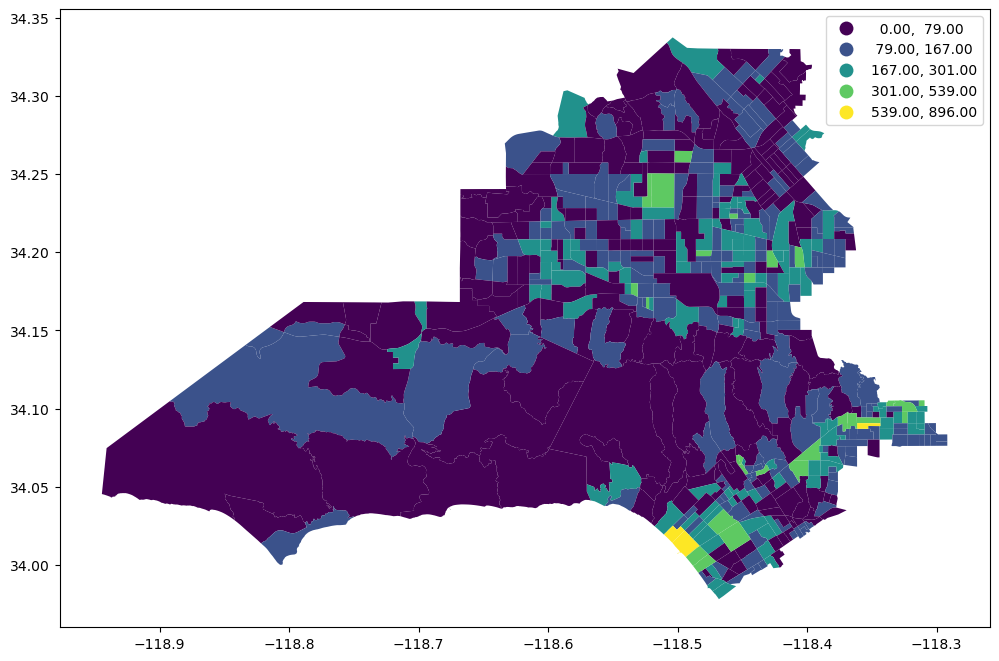

In [168]:
filtered_df.plot(figsize=(12,10),
                 column='HH_Less_Than_14999',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

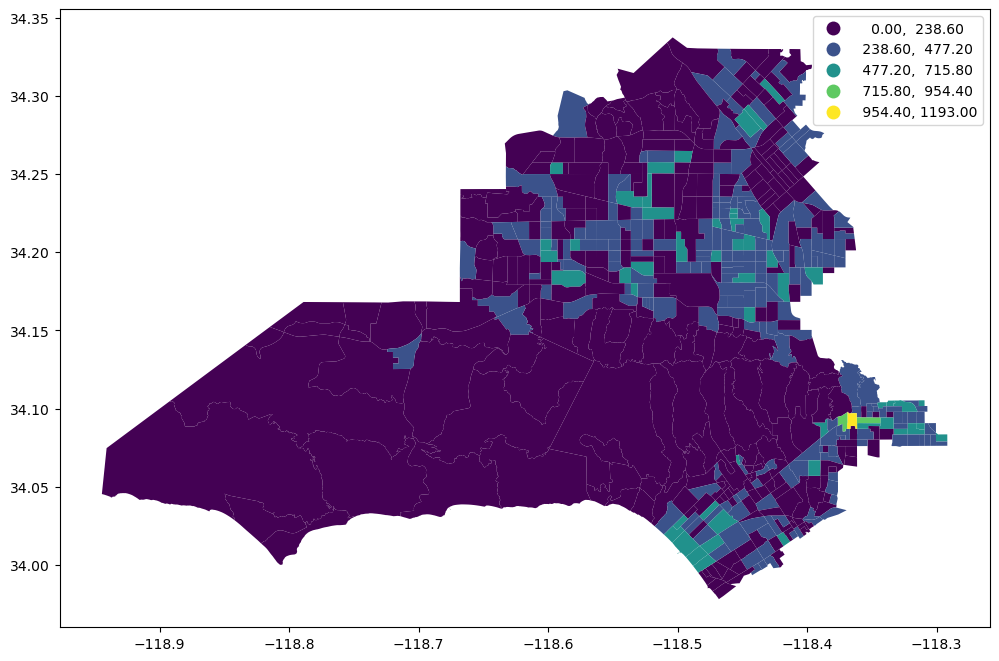

In [169]:
filtered_df.plot(figsize=(12,10),
                 column='HH_15K_To_44999',
                 legend=True, 
                 scheme='equal_interval')

<Axes: >

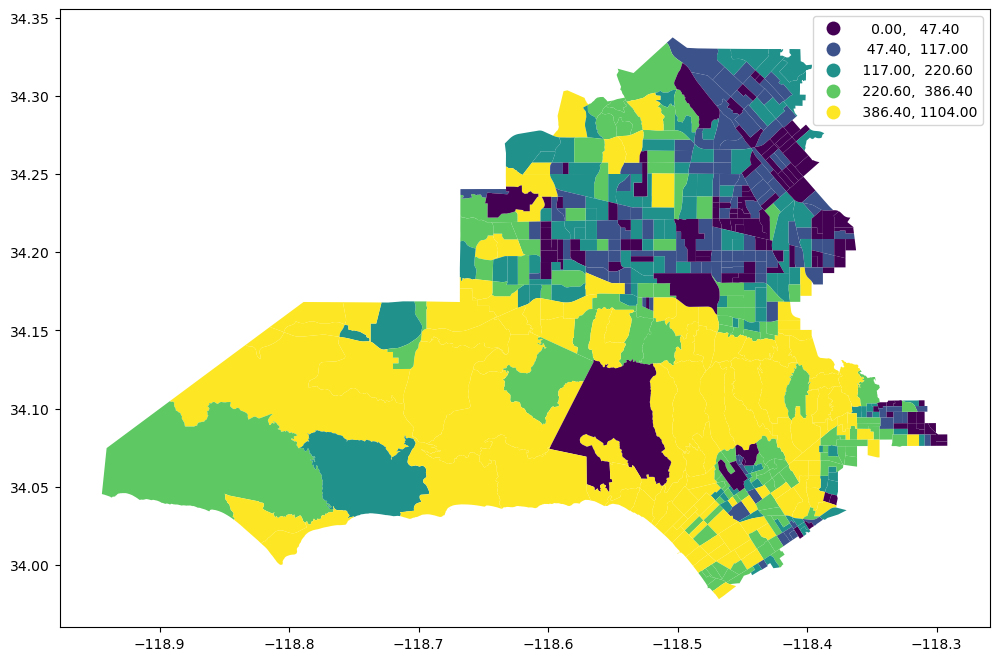

In [171]:
#At first glance there appears to be a lot more very wealthy areas in this district than very low income areas
filtered_df.plot(figsize=(12,10),
                 column='HH_200K_Or_More',
                 legend=True, 
                 scheme='quantiles')

Now I'm going to attempt to just map the parts of District 3 that are unincorporated areas. I filtered in Excel, because I was having trouble subsetting within the **district3** dataset.

In [174]:
district3['JURISDICTION'].unique()

array(['INCORPORATED CITY', 'UNINCORPORATED AREA',
       'INCORPORATED/UNINCORPORATED'], dtype=object)

In [193]:
d3unincorp_list = ['06037113231',
'06037113235',
'06037800103',
'06037800104',
'06037800206',
'06037800328',
'06037800335',
'06037800336',
'06037800406',
'06037800410',
'06037800504',
'06037800506',
'06037980017']

In [194]:
d3unincorp_df = tracts_income[tracts_income['FIPS'].isin(d3unincorp_list)]

In [195]:
d3unincorp_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 13 entries, 98 to 2481
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            13 non-null     int64   
 1   CT20                13 non-null     object  
 2   LABEL               13 non-null     object  
 3   ShapeSTArea         13 non-null     float64 
 4   ShapeSTLength       13 non-null     float64 
 5   geometry            13 non-null     geometry
 6   FIPS                13 non-null     object  
 7   Households          13 non-null     int64   
 8   HH_Less_Than_14999  13 non-null     int64   
 9   HH_15K_To_44999     13 non-null     int64   
 10  HH_45K_To_59999     13 non-null     int64   
 11  HH_60K_To_74999     13 non-null     int64   
 12  HH_75K_To_99999     13 non-null     int64   
 13  HH_100K_To_199999   13 non-null     int64   
 14  HH_200K_Or_More     13 non-null     int64   
dtypes: float64(2), geometry(1), int64(9)

This does look a little funky with disparate shapes, so I'm going to try in Folium.

<Axes: >

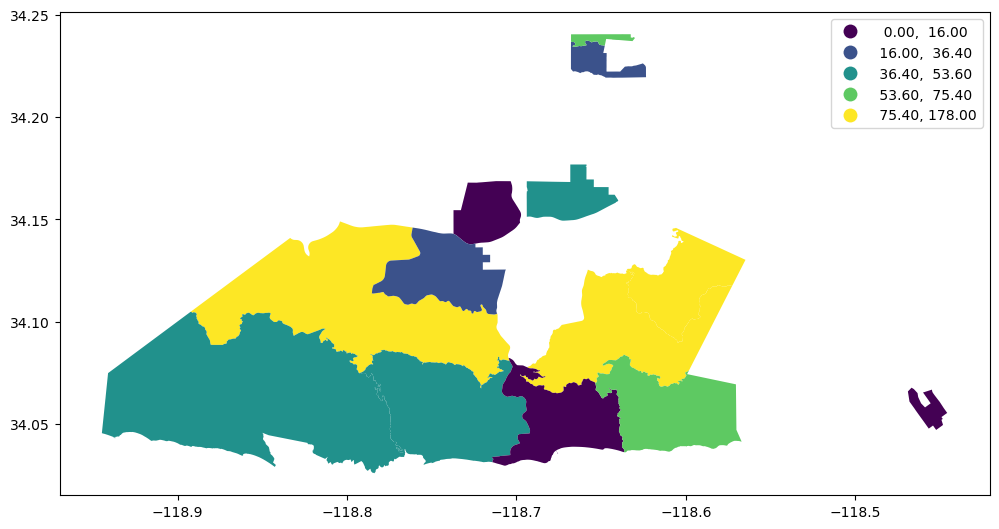

In [196]:
d3unincorp_df.plot(figsize=(12,10),
                 column='HH_60K_To_74999',
                 legend=True, 
                 scheme='quantiles')

# Folium

In [188]:
import folium 

In [198]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=d3unincorp_df, # geo data
                  data=d3unincorp_df, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'HH_60K_To_74999'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Number of Households With Incomes Between 60K To 74999').add_to(m)    # name on the legend color bar
m

In [199]:
m.save('LA_D3_Unincorp.html')